## Written by Abiola Obembe
## Date 21-08-2020
### Objective: Impact of weight initialization on  Neural Network model performance/accuracy

In [19]:
# install packages
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

print("Packages installed!")


Packages installed!


Training set data
(2, 300)
(1, 300)
Training set data
(2, 100)
(1, 100)


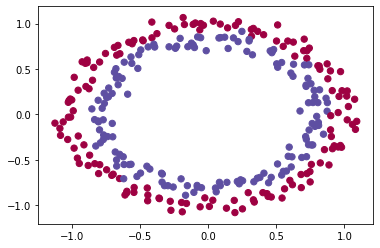

In [2]:
# load dataset
# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

# training set
print("Training set data")
print(train_X.shape)
print(train_Y.shape)

# test set data
print("Training set data")
print(test_X.shape)
print(test_Y.shape)

## Neural Network Archeticture

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Zero initialization

In [4]:
# FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters["W"+ str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters["b"+ str(l)] = np.zeros((layers_dims[l],1))
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


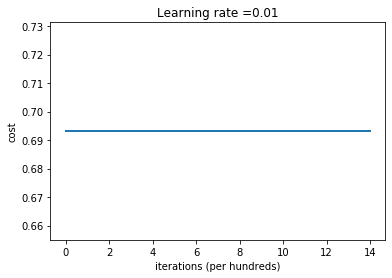

The training set accuracy is
Accuracy: 0.5
The test set accuracy is
Accuracy: 0.5


In [6]:
# Run code with zero intialization
parameters = model(train_X, train_Y, learning_rate = 0.01, initialization = "zeros")

print("The training set accuracy is") 
predict_train = predict(train_X, train_Y, parameters)
print("The test set accuracy is" )
predict_test = predict(test_X, test_Y, parameters)

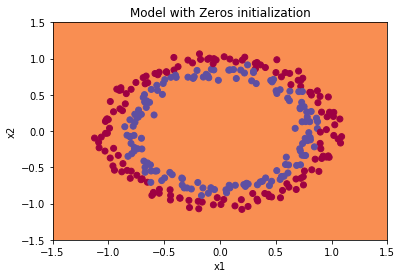

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Random Initialization

In [8]:
# FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters["W"+ str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*5
        parameters["b"+ str(l)] = np.zeros((layers_dims[l],1))

    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 8.94314237  2.18254925  0.48248734]
 [-9.31746352 -1.38694101 -1.7737949 ]]
b1 = [[0.]
 [0.]]
W2 = [[-0.41370741 -3.13500338]]
b2 = [[0.]]


Cost after iteration 0: inf


C:\Users\obemb\OneDrive\Documents\Cousera_DL_Specialization\NN_DL_Course2\Week 5\Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\obemb\OneDrive\Documents\Cousera_DL_Specialization\NN_DL_Course2\Week 5\Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.7764016326053894
Cost after iteration 2000: 0.6650540927209406
Cost after iteration 3000: 0.6615454776518762
Cost after iteration 4000: 0.6564203541222018
Cost after iteration 5000: 0.6474951179500058
Cost after iteration 6000: 0.6273079825905841
Cost after iteration 7000: 0.5017918381995807
Cost after iteration 8000: 0.4006645365353817
Cost after iteration 9000: 0.3830085542803765
Cost after iteration 10000: 0.3748872163725983
Cost after iteration 11000: 0.3660625055138088
Cost after iteration 12000: 0.35527764147622654
Cost after iteration 13000: 0.3496982553660988
Cost after iteration 14000: 0.34638851449885355


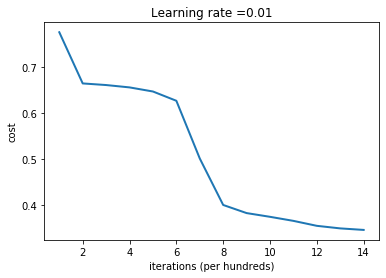

The training set accuracy is
Accuracy: 0.8566666666666667
The test set accuracy is
Accuracy: 0.85


In [10]:
# Run code with random intialization
parameters = model(train_X, train_Y, learning_rate = 0.01, initialization = "random")

print("The training set accuracy is") 
predict_train = predict(train_X, train_Y, parameters)
print("The test set accuracy is" )
predict_test = predict(test_X, test_Y, parameters)

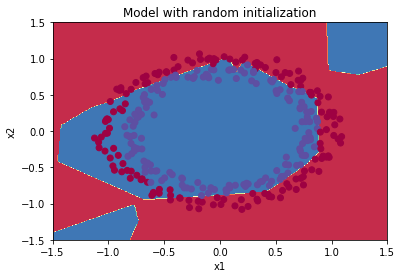

In [11]:
# Visualization
plt.title("Model with random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## He Initialization

In [12]:
# FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np. sqrt(2/ layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [13]:
# test
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


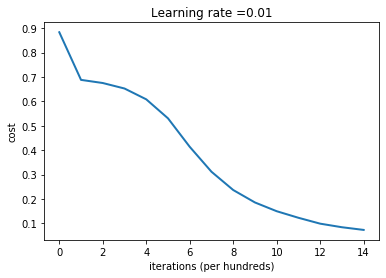

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [14]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

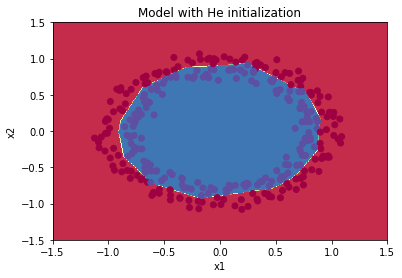

In [15]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Xavier Initialization

In [16]:
# FUNCTION: initialize_parameters_he

def initialize_parameters_xavier(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np. sqrt(1/ layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

Cost after iteration 0: 0.729451703805014
Cost after iteration 1000: 0.6939441869897982
Cost after iteration 2000: 0.686361215705118
Cost after iteration 3000: 0.6783983102177117
Cost after iteration 4000: 0.6642724691723297
Cost after iteration 5000: 0.6361798618357726
Cost after iteration 6000: 0.5845947883351541
Cost after iteration 7000: 0.4968293476934554
Cost after iteration 8000: 0.3892480115718082
Cost after iteration 9000: 0.29444331521215017
Cost after iteration 10000: 0.2286133640197962
Cost after iteration 11000: 0.18314787866387175
Cost after iteration 12000: 0.15008009718377693
Cost after iteration 13000: 0.1267612749373751
Cost after iteration 14000: 0.10850689140892145


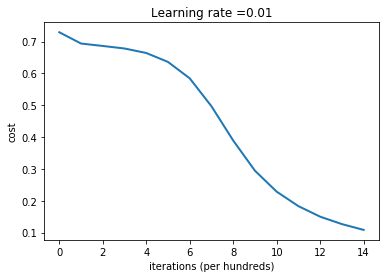

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.93


In [17]:
parameters = model(train_X, train_Y, initialization = "xavier")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

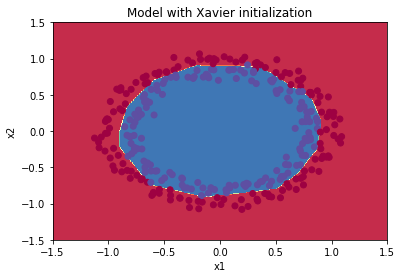

In [18]:
plt.title("Model with Xavier initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### The NN model initialzed with the He method resulted in the highest accuracy of 96% on the test set